In [8]:
# importar librerías
import pandas as pd

In [9]:
# bases de datos en csv
df_cronicos = pd.read_csv("data/cronicos.csv", low_memory=False)
df_egresos = pd.read_csv("data/egresos.csv")
df_usuarios = pd.read_csv("data/usuarios.csv", low_memory=False)


print(df_cronicos.shape)
print(df_egresos.shape)
print(df_usuarios.shape)

(38736, 290)
(6376, 66)
(183911, 16)


## Filtro de jovenes y contrato PGP

In [10]:
################### FILTRAR DATOS SOLO DE LOS PACIENTES JOVENES (18 - 29) ###################
jovenes = df_usuarios[df_usuarios["CICLO_VITAL"] == "Juventud"]

# Solo unir los ID de los jovenes con los ID de los otros df con KEY "NRODOC"
df = jovenes.merge(df_cronicos, on="NRODOC", how="inner").merge(
    df_egresos, on="NRODOC", how="inner"
)

################### FILTRAR DATOS SOLO DE LA MODALIDAD PGP ###################
df = df[
    (df["EPS VALIDADA"] != "NUEVA EPS S.A.")
    & (df["EPS VALIDADA"] != "NO AFILIADO PARTICULAR")
]

# Eliminar filas
df = df.dropna(subset=["EPS VALIDADA"])  # Eliminar filas con EPS VALIDADA vacío

df.shape

(6464, 370)

## Eliminar columnas

In [11]:
############################## COLUMNAS NULAS ##############################

# ver datos null en df en porcentaje con el total
nulos = df.isnull().sum() / len(df) * 100

# Borrar nulos mayores o iguales a 50% (por criterio)
nulos = nulos[nulos >= 50]
nulos

Observaciones                       89.542079
Presión arterial registro medico    62.515470
Tipo diabetes mellitus              91.676980
Es insulinorequiriente              91.676980
Tiempo con el diagnóstico           91.676980
                                      ...    
FECHA POSIBLE ALTA                  87.484530
PERTINENCIA DIAGNOSTICA             71.333540
CAUSA BASICA MUERTE COD             99.953589
CAUSA BASICA CATEGORIA COD          99.953589
CAUSA BASICA CAPITULO COD           99.953589
Length: 210, dtype: float64

Tenemos 210 columnas con nulos mayor a un 50%, se analizan las columnas con nulos menor a 90% y se eliminan directamente las columnas con nulos mayor a 90%

BORRAR:
* Observaciones: Datos en texto complejos de tratar
* FECHA POSIBLE ALTA: Son 4 categorías y tiene muchos nulos
* Diagnostico4: son los códigos pero se dejó el diagnostico en texto
* Tiempo con el diagnóstico1: La mayoría son ND
* Diagnostico3: son los códigos pero se dejó el diagnostico en texto
* Fecha LDL: mayoría son ND
* Diagnostico2: son los códigos pero se dejó el diagnostico en texto
* Fecha hemoglobina glicosilada: mayoría son ND
* Fecha cita morbilidad: mayoría son ND

DEJAR:
* NombreDiagnostico4
* NombreDiagnostico3
* NombreDiagnostico2
* PERTINENCIA DIAGNOSTICA
* Presión arterial registro medico 
* Tiene riesgo de tener Diabetes Mellitus

In [12]:
# Del conjunto que vamos a borrar, dejamos estas columnas que tienen importancia
nulos = nulos.drop(
    [
        "NombreDiagnostico4",
        "NombreDiagnostico3",
        "NombreDiagnostico2",
        "PERTINENCIA DIAGNOSTICA",
        "Presión arterial registro medico",
        "Tiene riesgo de tener Diabetes Mellitus",
    ]
)


df = df.drop(nulos.index, axis=1)
df.shape

(6464, 166)

In [13]:
# For con value_counts() para ver los valores de las columnas
for col in df.columns:
    print(col)
    print("----------------------------------")
    print(df[col].value_counts())
    print()

MES_x
----------------------------------
MES_x
DICIEMBRE     665
ENERO         649
FEBRERO       649
MARZO         641
MAYO          615
JUNIO         615
OCTUBRE       517
SEPTIEMBRE    512
ABRIL         473
JULIO         382
AGOSTO        375
NOVIEMBRE     371
Name: count, dtype: int64

YEAR_x
----------------------------------
YEAR_x
2021    2935
2018    1712
2022    1396
2017     421
Name: count, dtype: int64

NRODOC
----------------------------------
NRODOC
312214    2793
308002     756
312667     540
312920     432
307997     420
310335     320
307227     272
308001     168
311380     155
307508     126
312933     126
312217      57
310336      56
313556      56
312976      54
313285      49
310369      28
313428      24
312918      21
314091       8
313416       3
Name: count, dtype: int64

SEXO
----------------------------------
SEXO
F    3522
M    2942
Name: count, dtype: int64

FECHA NACIMIENTO_x
----------------------------------
FECHA NACIMIENTO_x
1994-06-21 00:00:00    264

In [14]:
# Si en Diabetes Mellitus dice "Si", entonces en columna "Tiene riesgo de tener Diabetes Mellitus" colocar "Posee diabetes"
df.loc[
    df["Diabetes Mellitus"] == "Si", "Tiene riesgo de tener Diabetes Mellitus"
] = "Posee diabetes"

In [15]:
lista = [
    "Ingreso",
    "Hora",
    "Atención",
    "Constantes",
    "Cuantos cigarrillos día",
    "Años de Consumo",
    "Tipo control",
    "NRO CAMA ANTERIOR",
    "DEMORA APLICACION MEDICAMENTO",
    "Análisis y conducta a seguir",
    "Fecha glicemia",
    "Fecha HDL",
    "Fecha colesterol total",
    "Fecha trigliceridos",
    "Fecha creatinina1",
    "Fecha microalbuminuria",
    "Fecha creatinina2",
    "FECHA INGRESO SERVICIO",
    "FECHA RECAUDO",
    "FECHA CAMILLERO",
    "FECHA ENFERMERIA",
    "FECHA FACTURACION AUDIFARMA",
    "FECHA FARMACIA",
    "FECHA ASEO",
    "FECHA NACIMIENTO_x",
    "FECHA NACIMIENTO_y",
    "MES_x",
    "MES_y",
    "YEAR_x",
    "YEAR_y",
    "YEAR",
    "MES",
    "Fecha Próximo Control",
    "Fecha diligenciamiento",
    "FECHA INICIO AL PGP",
    "FECHA PRIMERA CLASE FUNCIONAL",
    "FECHA ÚLTIMA CLASE FUNCIONAL",
    "SERVICIO HABILITADO COD",
    "DXPRINCIPAL EGRESO COD",
    "DX RELACIONADO1 COD",
    "DX RELACIONADO2 COD",
    "DX RELACIONADO3 COD",
    "DX PRINCIPAL EGRESO CATEGORIA COD",
    "DX PRINCIPAL EGRESO CAPITULO COD",
    "CICLO_VITAL",
    "QUINQUENIO",
    "DEPARTAMENTO",
    "MUNICIPIO",
    "REGIMEN AFILIACION",
    "FUENTE FINANCIACION1",
    "FUENTE FINANCIACION2",
    "CAUSA BASICA MUERTE",
    "CAUSA BASICA CATEGORIA",
    "CAUSA BASICA CAPITULO",
    "Tipo",
    "TIPO IDENTIFICACION",
    "Clasificación de Framinghan",
    "Meses de diferencia entre TFG",
    "Cambio de TFG",
    "EPS VALIDADA",
    "MODALIDAD CONTRATO",
    "Peso",
    "Talla",
    "IMC",
    "Perímetro Muslo",
    "Perímetro Cintura",
    "Pliegue Triceps",
    "Pliegue Abdomen",
    "Pliegue Muslo",
    "Sumatoria Pliegues",
    "Índice de Fragilidad Groningen",
    "Tiempo en Segundos (Apoyo Monopodal)",
    "Tiempo en Segundos (Recorrer 5 metros)",
    "Velocidad (m/s)",
    "DEMORA SALIDA CLINICA (DIAS)",
    "BLOQUE ANTERIOR",
    "BLOQUE",
    "UNIDAD ESTRATEGICA",
    "NRO CAMA",
    "NRO ATENCION",
    "NRO INGRESO",
    "Tiene EPOC",
    "DEMORA ASIGNACION CAMA",
    "PROFESIONAL ESPECIALIDAD",
    "Clase Funcional",
    "NombreDiagnostico1",
    "Diagnostico1",
    "Presión Arterial Sistólica",
    "Presión Arterial Diastólica",
    "Diabetes Mellitus",
    "Control Diabetes",
    "Tiene HTA",
    "Control HTA",
    "Valvulopatía",
    "Arritmia o paciente con dispositivo",
    "PISO ANTERIOR",
    "SERVICIO ANTERIOR",
    "VIA INGRESO",
    "PISO",
    "SERVICIO EGRESO",
    "FECHA ALTA MEDICA",
    "ALTA MEDICA",
    "POSIBLE ALTA",
]

# Eliminar las columnas de la lista
df = df.drop(lista, axis=1)
df.shape

(6464, 63)

* -------------Consideramos que no aportan
* Ingreso: Se tiene ya una fecha de ingreso
* Hora: 
* Atención: 
* Constantes: No tiene diccionario
* Cuantos cigarrillos dÃ­a: Tomaremos variable Tabaquismo
* Años de Consumo: Tomaremos variable Tabaquismo
* Tipo control: Tomaremos Tiene proximo control
* NRO CAMA ANTERIOR: La mayoría es sin inf
* DEMORA APLICACION MEDICAMENTO: Datos mal estructurados
* Análisis y conducta a seguir: Texto
* DEMORA ASIGNACION CAMA: Datos mal estructurados
* PROFESIONAL ESPECIALIDAD: Se tomará la especialidad codificada en GRD
* Clase Funcional: Ya tenemos la clase funcional
* ------------------FECHAS MEDICAMENTOS------------------------
* Fecha glicemia
* Fecha HDL
* Fecha colesterol total
* Fecha trigliceridos
* Fecha creatinina1
* Fecha microalbuminuria
* Fecha creatinina2
* ---------------------------FECHAS------------------------
* FECHA INGRESO SERVICIO: Tomaremos ingreso a la clinica
* FECHA RECAUDO: 
* FECHA CAMILLERO:
* FECHA ENFERMERIA: 
* FECHA FACTURACION AUDIFARMA: 
* FECHA FARMACIA: 
* FECHA ASEO: 
* FECHA NACIMIENTO_x: Tenemos la edad
* FECHA NACIMIENTO_y:
* MES_x: 
* MES_y:
* YEAR_x:
* YEAR_y:
* YEAR: 
* MES:  
* Fecha Próximo Control: Tomaremos Tiene proximo control
* Fecha diligenciamiento: 
* FECHA INICIO AL PGP: Se tomaran todos los que tienen contrato PGP
* FECHA PRIMERA CLASE FUNCIONAL: Tomaremos solo fecha entrada y salida
* FECHA ÚLTIMA CLASE FUNCIONAL: Tomaremos solo fecha entrada y salida
* ---------------------------CODIGOS------------------------
* SERVICIO HABILITADO COD
* DXPRINCIPAL EGRESO COD
* DX RELACIONADO1 COD
* DX RELACIONADO2 COD
* DX RELACIONADO3 COD
* DX PRINCIPAL EGRESO CATEGORIA COD
* DX PRINCIPAL EGRESO CAPITULO COD
* NombreDiagnostico1:(hay fechas y nombres)
* Diagnostico1: los cod coinciden con fechas y algunos con nombres pero no todos
* ----------Pocas categorias que no aportan------------------------
* CICLO_VITAL: Ya se filtraron jovenes
* QUINQUENIO: Se tienen edades
* DEPARTAMENTO: 1 cat Solo está Antioquia
* MUNICIPIO: 3 cat tomaremos barrios
* REGIMEN AFILIACION: 1 cat y no aporta
* FUENTE FINANCIACION1: 1 cat
* FUENTE FINANCIACION2: 3 cat y la mayoria es sin inf
* CAUSA BASICA MUERTE: 1 cat 
* CAUSA BASICA CATEGORIA: 1 cat
* CAUSA BASICA CAPITULO: 1 cat
* Tipo: 1 cat Todos son CC
* TIPO IDENTIFICACION: 1 cat Todos son CC
* Clasificación de Framinghan: Solo una categoria y los nulos no se pueden asignar
* Meses de diferencia entre TFG: 2 categorias y 28 en una
* Cambio de TFG: 3 categorias y 28 en una
* EPS VALIDADA: 1 cat Ya se filtraron todos los de PGP
* MODALIDAD CONTRATO: 1 cat Ya se filtraron todos los de PGP
* DEMORA SALIDA CLINICA (DIAS) - (tiene un -15 y desbalance de clase)
* BLOQUE ANTERIOR (2 cat se tomarra PISO ANTERIOR)
* BLOQUE
* UNIDAD ESTRATEGICA: pocas cat y la mayoria en 1
* NRO CAMA: No relevante
* NRO ATENCION: No relevante
* NRO INGRESO: No relevante
* Tiene EPOC (1 cat y no se pueden imputar porque tienen SI, NO y SOSPECHA)
* ------------------Borrar porque tomaremos la clasificacion
* Peso
* Talla
* IMC
* Perí­metro Muslo
* Perí­metro Cintura
* Pliegue Triceps
* Pliegue Abdomen
* Pliegue Muslo
* Sumatoria Pliegues
* Índice de Fragilidad Groningen
* Tiempo en Segundos (Apoyo Monopodal)
* Tiempo en Segundos (Recorrer 5 metros)
* Velocidad (m/s)
* Presión Arterial Sistólica: Es más precisa la presión arterial registro médico
* Presión Arterial Diastólica: Es más precisa la presión arterial registro médico
* Diabetes Mellitus: Misma informacion en "Tiene riesgo de tener Diabetes Mellitus"
* Control Diabetes: Misma informacion en "Tiene riesgo de tener Diabetes Mellitus"
* Tiene HTA: Mejor informacion en "Tiene riesgo de tener HTA"
* Control HTA: Mejor informacion en "Tiene riesgo de tener HTA"
* Valvulopatía: Es considerada enfermedad cardiovascular (ya existe esa variable) (tiene proporciones similares)
* Arritmia o paciente con dispositivo: Es considerada enfermedad cardiovascular (ya existe esa variable) (tiene proporciones similares)
* PISO ANTERIOR: Nos quedaremos con SERVICIO ADMITE
* SERVICIO ANTERIOR: Nos es más de utilidad los datos agrupados
* VIA INGRESO: Quedaremos con SERVICIO ADMITE
* PISO: Nos quedaremos con SERVICIO ADMITE
* SERVICIO EGRESO: Nos es más de utilidad los datos agrupados
* FECHA ALTA MEDICA: Fechas iguales a fecha salida 
* ALTA MEDICA: Nos brinda mejor informacion la variable "TIPO EGRESO"
* POSIBLE ALTA: Nos brinda mejor informacion la variable "TIPO EGRESO"

## Limpieza 

In [16]:
########################## Colocar en mayúsculas las categorías ##########################
df["BARRIO"] = df["BARRIO"].str.upper()

df["PRIMERA CLASE FUNCIONAL"] = df["PRIMERA CLASE FUNCIONAL"].str.upper()

df["ÚLTIMA CLASE FUNCIONAL"] = df["ÚLTIMA CLASE FUNCIONAL"].str.upper()

In [17]:
# ver datos null en df en porcentaje con el total
nulos = df.isnull().sum()

nulos = nulos[nulos > 0]
nulos

BARRIO                                        386
PRIMERA CLASE FUNCIONAL                      1781
ÚLTIMA CLASE FUNCIONAL                       1131
Test Findrisc                                 789
Índice Tobillo/Brazo                         1970
Presión arterial registro medico             4041
Glicemia                                      550
Hemoglobina Glicada                           550
Tiene riesgo de tener Diabetes Mellitus      4771
Tiene riesgo de tener HTA                     826
Enfermedad Coronaria (En el último año)       550
Insuficiencia Cardíaca                        550
Sufre de alguna enfermedad cardiovascular     550
Tabaquismo                                    550
Lipoproteina                                  550
HDL                                           550
Colesterol total                              550
Trigliceridos                                 550
Creatinina 1 consulta                         550
Tasa de Filtración Glomerular TFG             550


Se observan varias columnas con el mismo numero de nulos (550), por lo que se decide eliminar los registros de una columna para verificar si son los mismos que tienen nulos en las otras columnas y efectivamente son los mismos registros

In [18]:
############################## DATOS NULOS borrando registros ##############################
# Borrar registros nulos de "Diabetes Mellitus"
df = df.dropna(subset=["Glicemia"])  # Se eliminan demasiadas variables con nulos

# Borra registros nulos de "Control HTA"
df = df.dropna(
    subset=["Tiene riesgo de tener HTA"]
)  # No hay forma de saber si el paciente tiene o no HTA

# Borrar registros nulos de "Estadio de la Enfermedad Renal"
df = df.dropna(
    subset=["Estadio de la Enfermedad Renal"]
)  # Hay muy pocos nulos y no se puede saber si el paciente tiene o no ERC


############################## DATOS NULOS colocando NO REPORTA ##############################

# Barrio
df["BARRIO"] = df["BARRIO"].fillna("NO REPORTA")
# PRIMERA CLASE FUNCIONAL colocar en SIN CLASIFICAR
df["PRIMERA CLASE FUNCIONAL"] = df["PRIMERA CLASE FUNCIONAL"].fillna("SIN CLASIFICAR")
# ULTIMA CLASE FUNCIONAL colocar en SIN CLASIFICAR
df["ÚLTIMA CLASE FUNCIONAL"] = df["ÚLTIMA CLASE FUNCIONAL"].fillna("SIN CLASIFICAR")
# Test Findrisc colocar como NO REPORTA
df["Test Findrisc"] = df["Test Findrisc"].fillna("NO REPORTA")
# Indice Tobillo/Brazo colocar como NO REPORTA
df["Índice Tobillo/Brazo"] = df["Índice Tobillo/Brazo"].fillna("NO REPORTA")
# Nulos de "Tiene riesgo de tener Diabetes Mellitus" colocar como NO REPORTA
df["Tiene riesgo de tener Diabetes Mellitus"] = df[
    "Tiene riesgo de tener Diabetes Mellitus"
].fillna("NO REPORTA")
# Nulos de "Presión arterial registro medico" colocar como NO REPORTA
df["Presión arterial registro medico"] = df["Presión arterial registro medico"].fillna(
    "NO REPORTA"
)

# Nulos de "Basciloscopia" colocar como NO REPORTA
df["Basciloscopia"] = df["Basciloscopia"].fillna("NO REPORTA")

# Cambiar el No Aplica por NO REPORTA
df["Basciloscopia"] = df["Basciloscopia"].replace("No aplica", "NO REPORTA")


# Nulos por "Ulcera de pie diabetico" colocar como NO REPORTA
df["Úlcera de pie diabético"] = df["Úlcera de pie diabético"].fillna("NO REPORTA")


# Nulos por "Tiene proximo control" colocar como ND
df["Tiene próximo control"] = df["Tiene próximo control"].fillna("ND")


# Nulos por "Requiere cita de morbilidad" colocar como ND
df["Requiere cita de morbilidad"] = df["Requiere cita de morbilidad"].fillna("ND")


# Nulls de "Ámbito según el medico" colocar como NO REPORTA
df["Ambito según el médico"] = df["Ambito según el médico"].fillna("NO REPORTA")

# Nulos de "NombreDiagnostico2" colocar como NO REPORTA
df["NombreDiagnostico2"] = df["NombreDiagnostico2"].fillna("NO REPORTA")
# Nulos de "NombreDiagnostico3" colocar como NO REPORTA
df["NombreDiagnostico3"] = df["NombreDiagnostico3"].fillna("NO REPORTA")
# Nulos de "NombreDiagnostico4" colocar como NO REPORTA
df["NombreDiagnostico4"] = df["NombreDiagnostico4"].fillna("NO REPORTA")


# cambiar p por SI y nulos por NO
df["PERTINENCIA DIAGNOSTICA"] = df["PERTINENCIA DIAGNOSTICA"].replace("p", "SI")
df["PERTINENCIA DIAGNOSTICA"] = df["PERTINENCIA DIAGNOSTICA"].fillna("NO")


# En los nulos de "Tiene riesgo de tener Diabetes Mellitus" colocar "No reporta"
df["Tiene riesgo de tener Diabetes Mellitus"] = df[
    "Tiene riesgo de tener Diabetes Mellitus"
].fillna("No reporta")


#####################################VERIFICAR NULOS#####################################
nulos = df.isnull().sum()

nulos = nulos[nulos > 0]
print(nulos)
print(df.shape)

Series([], dtype: int64)
(5620, 63)


In [19]:
# For con value_counts() para ver los valores de las columnas
for col in df.columns:
    print(col)
    print("----------------------------------")
    print(df[col].value_counts())
    print()

NRODOC
----------------------------------
NRODOC
312214    2394
308002     756
312667     468
312920     432
307997     420
307227     272
308001     168
311380     155
310335     128
312933     108
313556      56
313285      49
307508      42
310336      42
312217      38
312976      36
313428      24
312918      21
314091       8
313416       3
Name: count, dtype: int64

SEXO
----------------------------------
SEXO
F    3104
M    2516
Name: count, dtype: int64

EDAD
----------------------------------
EDAD
27.0    1605
25.0     935
26.0     813
28.0     672
20.0     671
24.0     531
21.0     346
23.0      40
19.0       7
Name: count, dtype: int64

BARRIO
----------------------------------
BARRIO
ROBLEDO EL DIAMANTE    2268
VILLA HERMOSA           756
BELLO - EL TRAPICHE     468
ESPIRITU SANTO          432
LA FLORESTA             420
NO REPORTA              364
SAN JAVIER              272
GUAYABAL                168
SAN CRISTOBAL           108
BELLO LAS VEGAS          72
CASTILLA      

In [54]:
df.columns

Index(['NRODOC', 'SEXO', 'EDAD', 'BARRIO', 'PRIMERA CLASE FUNCIONAL',
       'ÚLTIMA CLASE FUNCIONAL', 'Clasificación IMC',
       'Saturación de Oxígeno (%)', 'Frecuencia Cardíaca en reposo',
       'Auto-calificacion Nivel de Ejercicio', 'METS -Índice Metabólico',
       'VO2 - Máxima Cantidad de Oxígeno',
       'Calificación (Índice de Fragilidad)', 'Calificación (Apoyo Monopodal)',
       'Calificación Velocidad', 'Test Findrisc', 'Índice Tobillo/Brazo',
       'Presión arterial registro medico', 'Glicemia', 'Hemoglobina Glicada',
       'Tiene riesgo de tener Diabetes Mellitus', 'Tiene riesgo de tener HTA',
       'Enfermedad Coronaria (En el último año)', 'Insuficiencia Cardíaca',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG',
       'Estadio de la Enfermedad Renal', 'Microalbuminuria',
       'Hormona Estimulante de la Tiroid

In [55]:
# Crear columna llamada dias en hospital que es la diferencia entre la fecha de ingreso y la fecha de egreso

df["FECHA INGRESO CLINICA"] = pd.to_datetime(df["FECHA INGRESO CLINICA"])
df["FECHA SALIDA"] = pd.to_datetime(df["FECHA SALIDA"])

df["dias en hospital"] = df["FECHA SALIDA"] - df["FECHA INGRESO CLINICA"]

df["dias en hospital"] = df["dias en hospital"].dt.days


## Análisis exploratorio

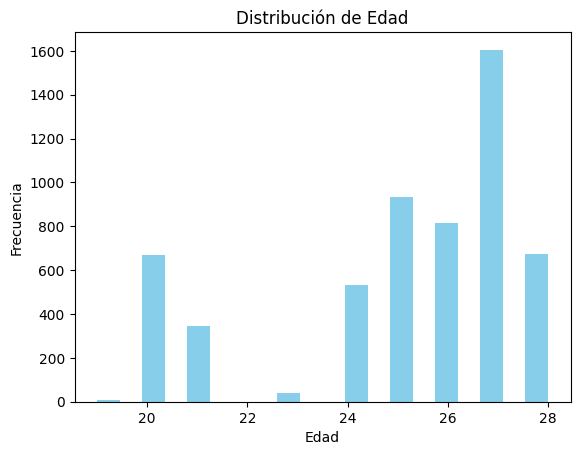

In [20]:
import matplotlib.pyplot as plt

plt.hist(df['EDAD'], bins=20, color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad')
plt.show()

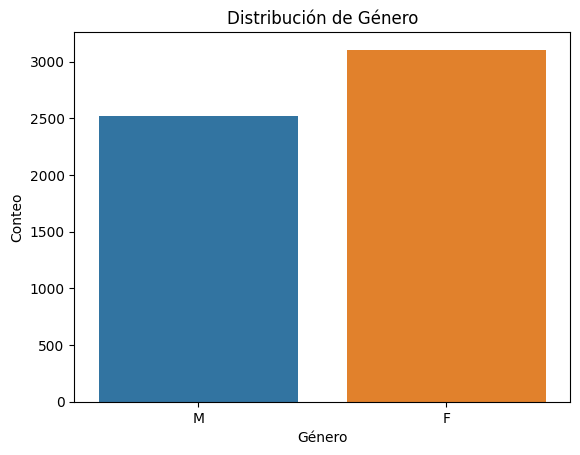

In [22]:
import seaborn as sns

sns.countplot(data=df, x='SEXO')
plt.xlabel('Género')
plt.ylabel('Conteo')
plt.title('Distribución de Género')
plt.show()

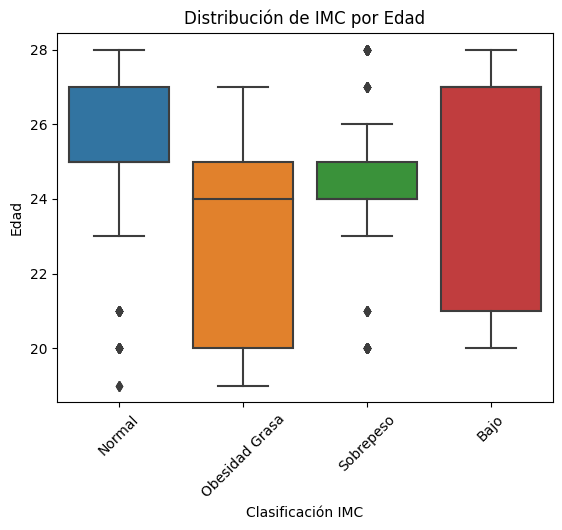

In [23]:
import seaborn as sns

sns.boxplot(data=df, x='Clasificación IMC', y='EDAD')
plt.xlabel('Clasificación IMC')
plt.ylabel('Edad')
plt.title('Distribución de IMC por Edad')
plt.xticks(rotation=45)
plt.show()

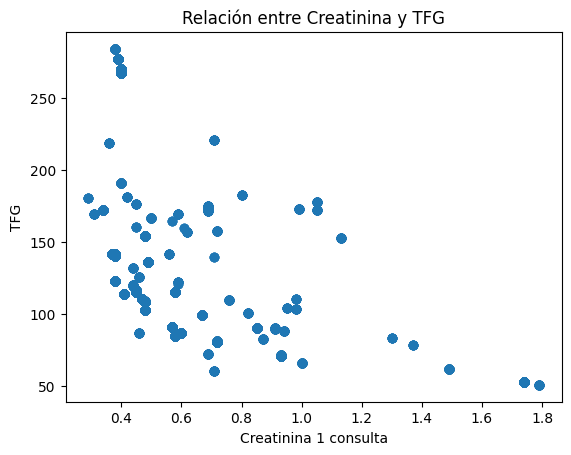

In [32]:
plt.scatter(df['Creatinina 1 consulta'], df['Tasa de Filtración Glomerular TFG'])
plt.xlabel('Creatinina 1 consulta')
plt.ylabel('TFG')
plt.title('Relación entre Creatinina y TFG')
plt.show()


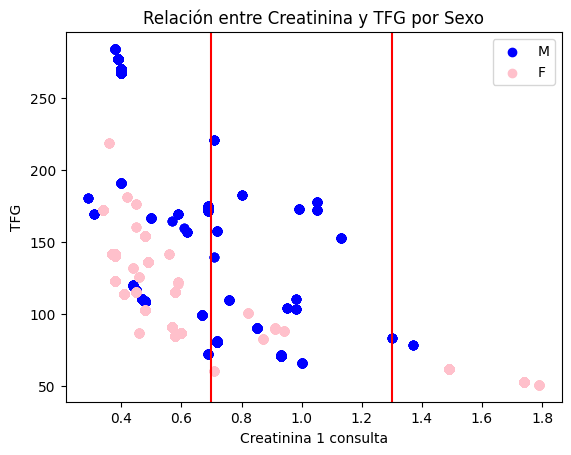

In [42]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con colores diferentes para cada sexo
plt.scatter(df[df['SEXO'] == 'M']['Creatinina 1 consulta'], df[df['SEXO'] == 'M']['Tasa de Filtración Glomerular TFG'], color='blue', label='M')
plt.scatter(df[df['SEXO'] == 'F']['Creatinina 1 consulta'], df[df['SEXO'] == 'F']['Tasa de Filtración Glomerular TFG'], color='pink', label='F')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Creatinina 1 consulta')
plt.ylabel('TFG')
plt.title('Relación entre Creatinina y TFG por Sexo')

# poner una línea en el eje X = 0.7 y en X = 1.3
plt.axvline(x=0.7, color='red')
plt.axvline(x=1.3, color='red')


# Mostrar leyenda para distinguir entre hombres y mujeres
plt.legend()

# Mostrar el gráfico
plt.show()



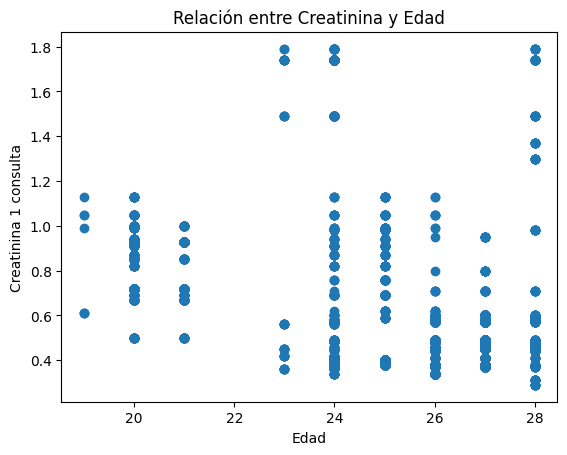

In [45]:
# Relación entre Creatinina y la edad
plt.scatter(df['EDAD'], df['Creatinina 1 consulta'])
plt.xlabel('Edad')
plt.ylabel('Creatinina 1 consulta')
plt.title('Relación entre Creatinina y Edad')
plt.show()


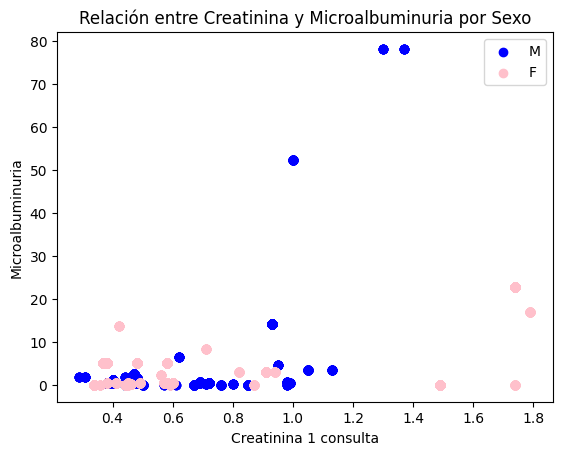

In [52]:
# Relación entre la creatinina 1 consulta y la microalbuminuria, separar por sexo
# Crear un gráfico de dispersión con colores diferentes para cada sexo

plt.scatter(df[df['SEXO'] == 'M']['Creatinina 1 consulta'], df[df['SEXO'] == 'M']['Microalbuminuria'], color='blue', label='M')
plt.scatter(df[df['SEXO'] == 'F']['Creatinina 1 consulta'], df[df['SEXO'] == 'F']['Microalbuminuria'], color='pink', label='F')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Creatinina 1 consulta')
plt.ylabel('Microalbuminuria')
plt.title('Relación entre Creatinina y Microalbuminuria por Sexo')

# Mostrar leyenda para distinguir entre hombres y mujeres
plt.legend()


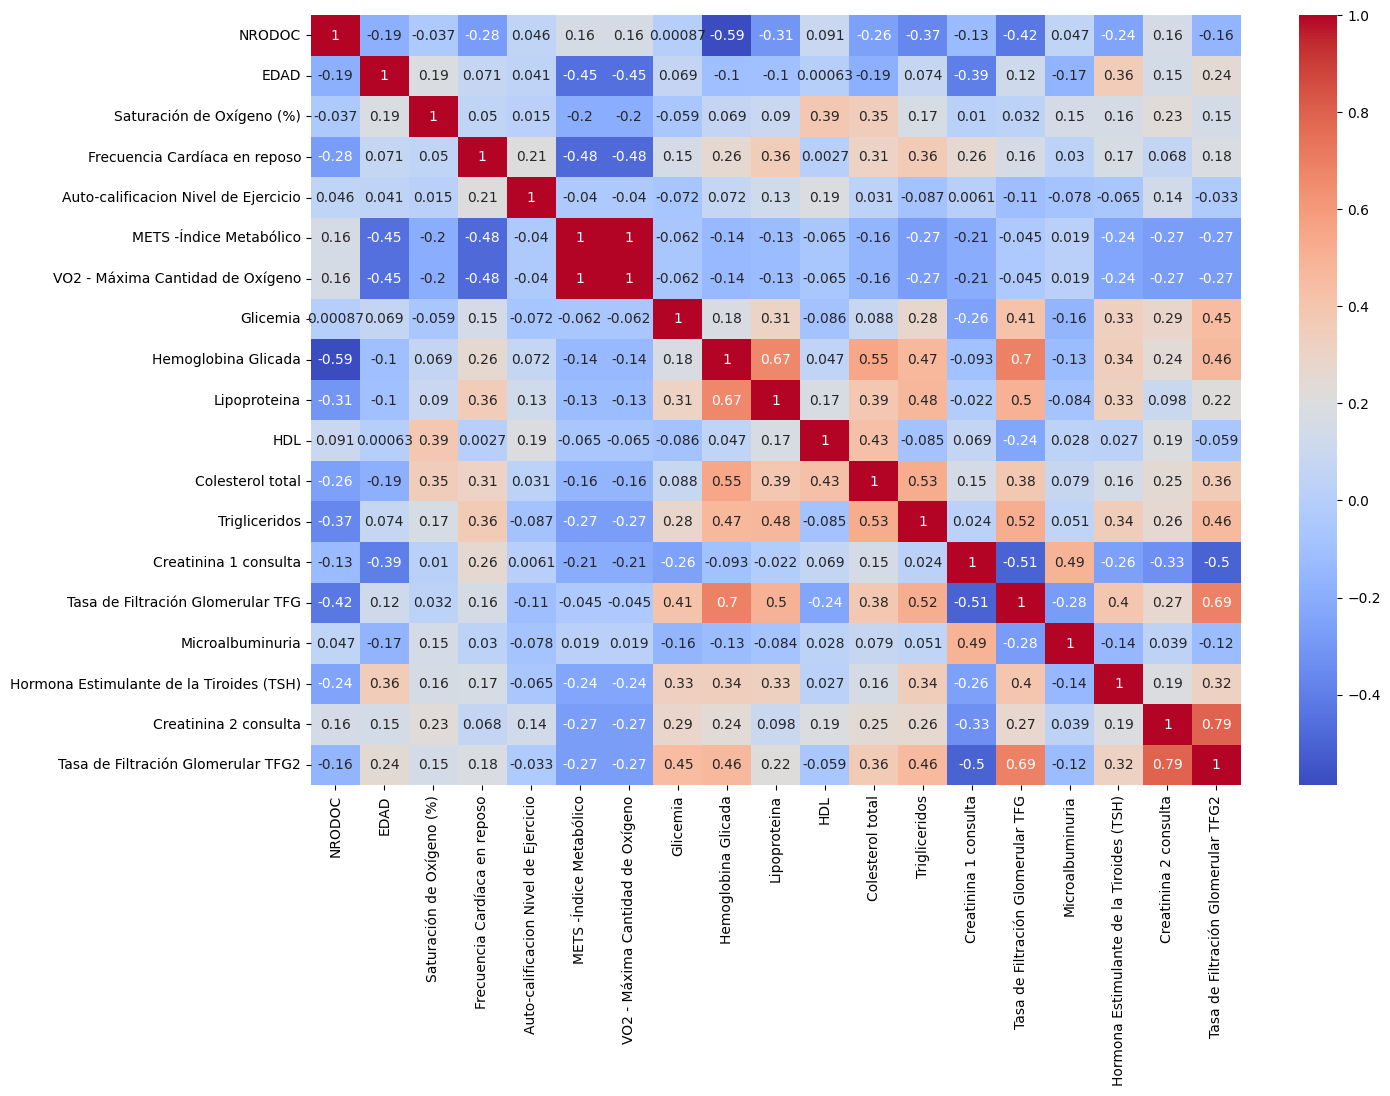

In [44]:
# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


Del gráfico actual, podemos observar que los jóvenes en su mayoría, tienen un funcionamiento renal bueno porque se puede evidenciar que entre más presencia de TGF hay, menor es la cantidad de Creatinina en el cuerpo, lo que quiere decir que los riñones de estos pacientes son eficientes a la hora de eliminar desechos del cuerpo humano.

# Enfermedades Cardiovasculares

Enfermedad Coronaria (En el último año)
No                5279
No aplica          303
Angina estable      38
Name: count, dtype: int64
Insuficiencia Cardíaca
No            5381
Controlada     155
No aplica       84
Name: count, dtype: int64
Sufre de alguna enfermedad cardiovascular
No    5542
Si      78
Name: count, dtype: int64


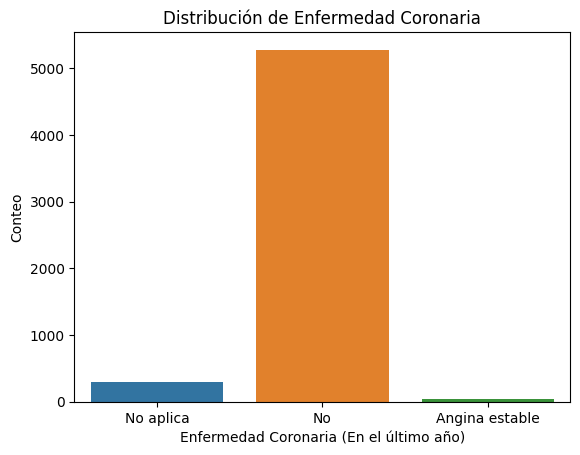

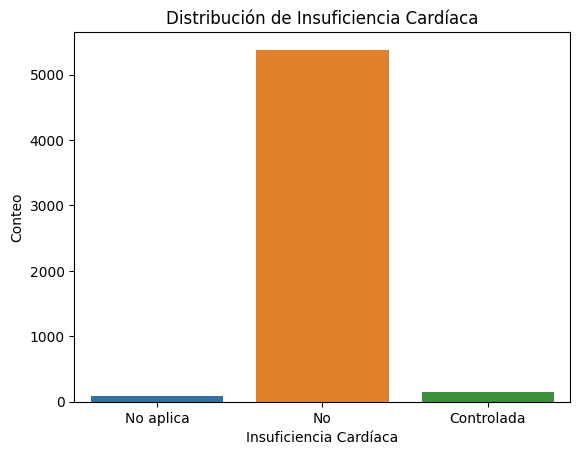

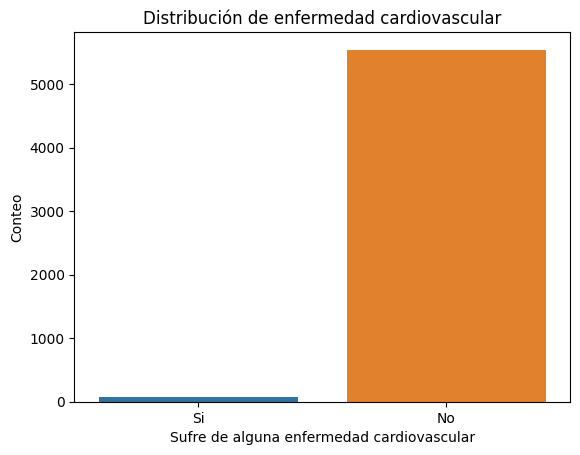

In [28]:
cardiovascular_vars = ['Enfermedad Coronaria (En el último año)', 'Insuficiencia Cardíaca', 'Sufre de alguna enfermedad cardiovascular']
for var in cardiovascular_vars:
    print(df[var].value_counts())

import seaborn as sns

sns.countplot(data=df, x='Enfermedad Coronaria (En el último año)')
plt.xlabel('Enfermedad Coronaria (En el último año)')
plt.ylabel('Conteo')
plt.title('Distribución de Enfermedad Coronaria')
plt.show()

import seaborn as sns

sns.countplot(data=df, x='Insuficiencia Cardíaca')
plt.xlabel('Insuficiencia Cardíaca')
plt.ylabel('Conteo')
plt.title('Distribución de Insuficiencia Cardíaca')
plt.show()

import seaborn as sns

sns.countplot(data=df, x='Sufre de alguna enfermedad cardiovascular')
plt.xlabel('Sufre de alguna enfermedad cardiovascular')
plt.ylabel('Conteo')
plt.title('Distribución de enfermedad cardiovascular')
plt.show()



Podemos ver la mayoría de jóvenes no presentan enfermedades cardiovasculares